# Project Planning Stage

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
sessions_url <- "https://raw.githubusercontent.com/infinite-Nagisa/Plaicraft-Project-Individual/refs/heads/main/sessions.csv"
sessions <- read_csv(sessions_url)
players_url <- "https://raw.githubusercontent.com/infinite-Nagisa/Plaicraft-Project-Individual/refs/heads/main/players.csv"
players <- read_csv(players_url)
download.file(sessions_url, "data/sessions.csv")
download.file(players_url, "data/players.csv")
glimpse(sessions)
sessions
glimpse(players)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.72e+12, 1.72e+12, 1.72e+12, 1.72e+12, 1.72e+12, …
$ original_end_time   <dbl> 1.72e+12, 1.72e+12, 1.72e+12, 1.72e+12, 1.72e+12, …


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.72e+12,1.72e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72e+12,1.72e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72e+12,1.72e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.72e+12,1.72e+12


Rows: 196
Columns: 9
$ experience       <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "A…
$ subscribe        <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRU…
$ hashedEmail      <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee97…
$ played_hours     <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.…
$ name             <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Ad…
$ gender           <chr> "Male", "Male", "Male", "Female", "Male", "Female", "…
$ age              <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22…
$ individualId     <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ organizationName <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…


## 1. Data Description:

### Players Dataset (`players.csv`)

- **Overview**: Contains information on 196 unique players, including demographics, experience, and subscription status.
- **Number of Variables**: 9
- **Variable Summary**:
  - **`experience`**:  
    - Type: Categorical  
    - Description: Indicates player experience level on playing Minecraft
  - **`subscribe`**:  
    - Type: Boolean  
    - Description: Indicates subscription status (`TRUE` = subscribed, `FALSE` = not subscribed)
  - **`hashedEmail`**:  
    - Type: Categorical  
    - Description: Anonymized unique identifier for linking with session data
  - **`played_hours`**:  
    - Type: Numerical  
    - Description: Total hours the player has played
  - **`name`**:  
    - Type: Categorical  
    - Description: Player’s name (may be irrelevant to analysis)
  - **`gender`**:  
    - Type: Categorical  
    - Description: Player’s gender
  - **`age`**:  
    - Type: Numerical  
    - Description: Player’s age in years
  - **`individualId`** and **`organizationName`**:  
    - Type: Categorical  
    - Description: Columns with only `NaN` values, likely irrelevant

- **Issues**:
  - Columns `individualId` and `organizationName` contain only missing values.

---

### Sessions Dataset (`sessions.csv`)

- **Overview**: Logs of 1,535 play sessions, with session times and player identifiers.
- **Number of Variables**: 5
- **Variable Summary**:
  - **`hashedEmail`**:  
    - Type: Categorical  
    - Description: Links to `players.csv` to identify sessions by player
  - **`start_time`** and **`end_time`**:  
    - Type: Categorical  
    - Description: Session start and end times
  - **`original_start_time`** and **`original_end_time`**:  
    - Type: Numerical  
    - Description: Unix timestamps for session start and end

- **Issues**:
  - Session start and end times require datetime conversion

## 2. Question:

Do players with lower experience levels tend to have shorter average playtime per session compared to more experienced players?
   - **From the `players`**: 
      - `experience`
   - **From the `sessions`**: 
      - `start_time` and `end_time`: calculate each session time
      - `hashedEmail`

We might want to merge both data sets by matching their `hashedEmail`, yielding a summary dataset that shows how average playtime per session varies by experience

## 3. Exploratory Data Analysis and Visualization

In [3]:
# First we start with data wrangling

# Sessions dataset
# Convert `start_time` and `end_time` to readable datetime
session_data <- sessions |>
  mutate(
    start_time = dmy_hm(start_time, tz = "UTC"),
    end_time = dmy_hm(end_time, tz = "UTC"),
  )

# Players dataset
# Only use columns with values
player_data <- players |>
    select(experience:age)
session_data
player_data

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.72e+12,1.72e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72e+12,1.72e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-28 15:36:00,2024-07-28 15:57:00,1.72e+12,1.72e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-25 06:15:00,2024-07-25 06:22:00,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-20 02:26:00,2024-05-20 02:45:00,1.72e+12,1.72e+12


experience,subscribe,hashedEmail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


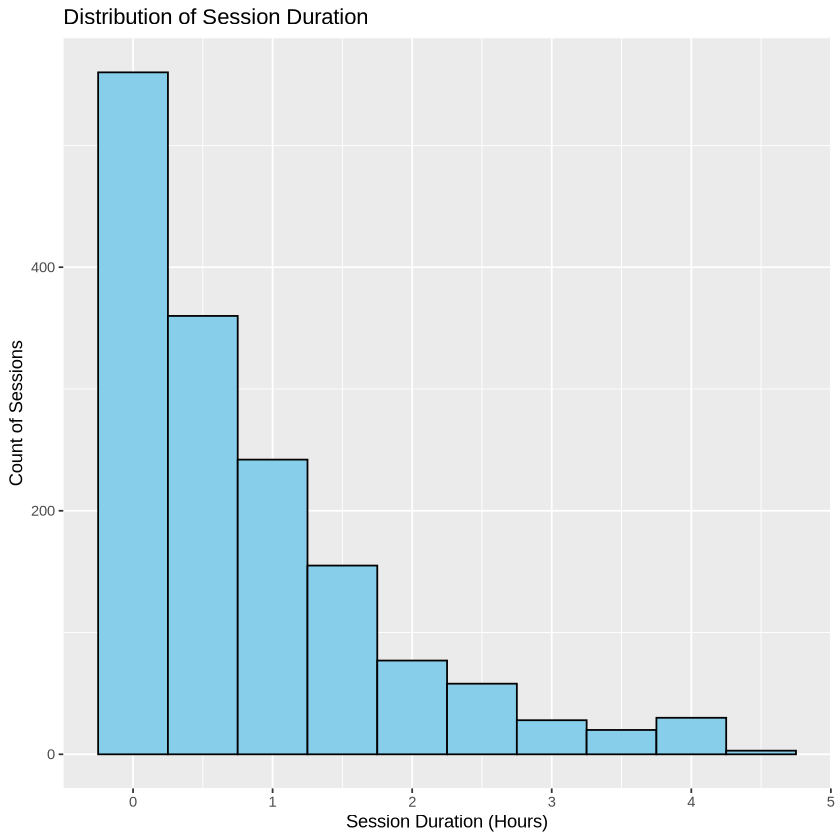

In [4]:
# Now we can create plots to visualize our data

# Plot 1: Distribution of Session Duration
ggplot(session_data, aes(x = as.numeric(end_time - start_time)/60)) +
  geom_histogram(binwidth = 0.5, fill = "skyblue", color = "black") +
  labs(
    title = "Distribution of Session Duration",
    x = "Session Duration (Hours)",
    y = "Count of Sessions"
  )


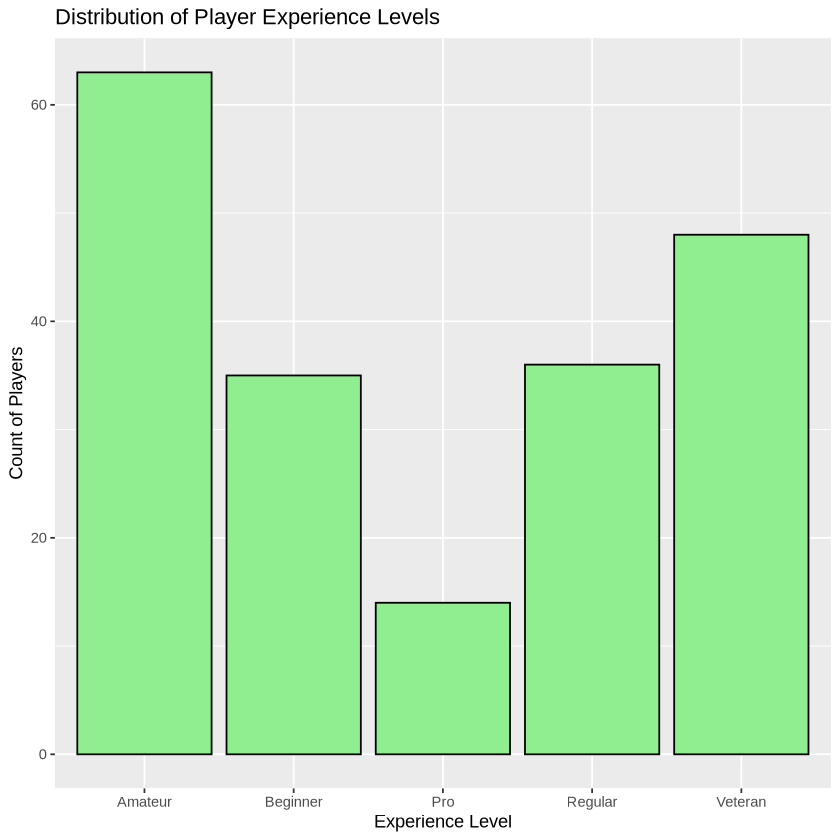

In [5]:
# Plot 2: Distribution of Player Experience Levels
ggplot(player_data, aes(x = experience)) +
  geom_bar(fill = "lightgreen", color = "black") +
  labs(
    title = "Distribution of Player Experience Levels",
    x = "Experience Level",
    y = "Count of Players"
  )

### 1. Distribution of Session Duration
   - **Insights**: The majority of sessions are relatively short, concentrated under 1 hour, with a gradual decline as session length increases. This suggests that most players engage in brief sessions. However, a few players have notably longer sessions.

### 2. Distribution of Player Experience Levels
   - **Insights**: "Amateur" has the highest count, followed by "Veteran" and "Regular." This indicates that while the dataset contains many casual players, there are also substantial groups at advanced experience levels.

## 4. Methods and Plan

### Proposed Method: Linear Regression

To investigate whether players with lower experience levels tend to have shorter average playtime per session, we propose using a **linear regression model** to quantify the relationship between player experience level (independent variable) and average session duration (dependent variable).

### Justification for Using Linear Regression
- **Appropriateness**: Linear regression is ideal for examining the association between a continuous response variable (average session duration) and a continuous or categorical predictor (experience level).
- **Interpretability**: It provides coefficients that indicate the relationship’s direction and strength, making findings straightforward to interpret.
- **Linearity**: Assumes a linear relationship between experience level and session duration, which will be checked through plots.
- **Independence**: Each observation should be independent, assuming no overlap among players.
- **Data Splitting**: Data will be split into training (70%) and testing (30%) sets after calculating average session duration per player.
- **Cross-Validation**: We’ll apply 5-fold cross-validation within the training set to prevent overfitting and assess model consistency.